In [1]:
pip install datasets

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install gensim

In [3]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install wordcloud

In [5]:
from datasets import load_dataset
import pandas as pd

# 1 Analyze and Visualize the Dataset

In [6]:
#to load the dataset
dataset = load_dataset("surrey-nlp/PLOD-CW")

Found cached dataset parquet (C:/Users/gopal/.cache/huggingface/datasets/surrey-nlp___parquet/surrey-nlp--PLOD-CW-843ef47e3e665cc1/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec)


  0%|          | 0/3 [00:00<?, ?it/s]

In [7]:
#available splits in dataset
dataset_keys = dataset.keys()
print("Available splits:", dataset_keys)
train_data = dataset['train']

Available splits: dict_keys(['train', 'validation', 'test'])


In [8]:
#Description of a dataset

train_data = dataset['train']
df=pd.DataFrame(train_data)
print('Total number of rows and columns are:',df.shape,'\n')
print('Information about dataset:\n')
print(df.info(),'\n')
print('Description of Dataset:\n',df.describe())

Total number of rows and columns are: (1072, 3) 

Information about dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1072 entries, 0 to 1071
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   tokens    1072 non-null   object
 1   pos_tags  1072 non-null   object
 2   ner_tags  1072 non-null   object
dtypes: object(3)
memory usage: 25.3+ KB
None 

Description of Dataset:
         tokens                                pos_tags  \
count     1072                                    1072   
unique    1071                                    1064   
top     [), .]  [PROPN, PUNCT, ADJ, NOUN, NOUN, PUNCT]   
freq         2                                       5   

                                  ner_tags  
count                                 1072  
unique                                 978  
top     [B-AC, B-O, B-LF, I-LF, I-LF, B-O]  
freq                                     8  


In [9]:
df.head()

,tokens,pos_tags,ner_tags
0,"[For, this, purpose, the, Gothenburg, Young, P...","[ADP, DET, NOUN, DET, PROPN, PROPN, PROPN, PRO...","[B-O, B-O, B-O, B-O, B-LF, I-LF, I-LF, I-LF, I..."
1,"[The, following, physiological, traits, were, ...","[DET, ADJ, ADJ, NOUN, AUX, VERB, PUNCT, ADJ, N...","[B-O, B-O, B-O, B-O, B-O, B-O, B-O, B-LF, I-LF..."
2,"[Minor, H, antigen, alloimmune, responses, rea...","[ADJ, PROPN, NOUN, ADJ, NOUN, ADV, VERB, ADP, ...","[B-O, B-AC, B-O, B-O, B-O, B-O, B-O, B-O, B-O,..."
3,"[EPI, =, Echo, planar, imaging, .]","[PROPN, PUNCT, NOUN, NOUN, NOUN, PUNCT]","[B-AC, B-O, B-LF, I-LF, I-LF, B-O]"
4,"[Furthermore, ,, eNOS, -, derived, NO, S, -, n...","[ADV, PUNCT, PROPN, PUNCT, VERB, PROPN, NOUN, ...","[B-O, B-O, B-AC, B-O, B-O, B-AC, B-O, B-O, B-O..."


In [10]:
print('Total number of rows and columns in train data are:',df.shape,'\n')

validation_data = dataset['validation']
vf=pd.DataFrame(validation_data)
print('Total number of rows and columns in validation data are:',vf.shape,'\n')

test_data = dataset['test']
tef=pd.DataFrame(test_data)
print('Total number of rows and columns in test data are:',tef.shape,'\n')

Total number of rows and columns in train data are: (1072, 3) 

Total number of rows and columns in validation data are: (126, 3) 

Total number of rows and columns in test data are: (153, 3) 



In [96]:
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

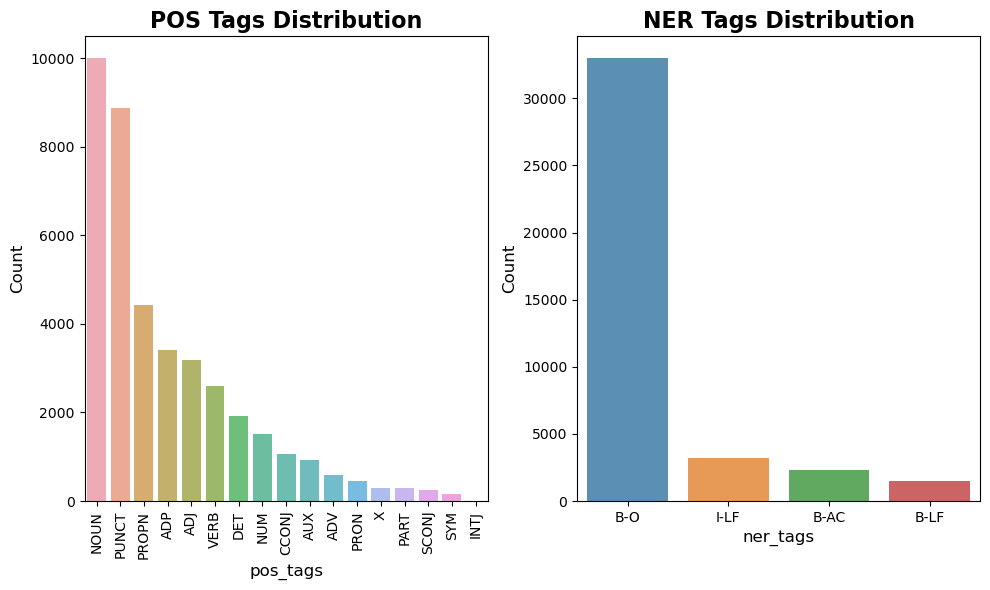

In [12]:
#to visualize distribution of pos_tags and ner_tags

pos_tags_count = df['pos_tags'].explode().value_counts()
ner_tags_count = df['ner_tags'].explode().value_counts()
tokens_count = df['tokens'].explode().value_counts()

plt.figure(figsize=(10, 6))
plt.subplot(1,2,1)
sns.barplot(x=pos_tags_count.index, y=pos_tags_count.values,alpha=0.8)
plt.title('POS Tags Distribution', fontsize=16, fontweight='bold')
plt.xlabel('pos_tags', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.barplot(x=ner_tags_count.index, y=ner_tags_count.values, alpha=0.8)
plt.title('NER Tags Distribution', fontsize=16, fontweight='bold')
plt.xlabel('ner_tags', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.tight_layout()
plt.show()

In [13]:
#it provides interactive visualization
from bokeh.plotting import figure, show

p1 = figure(x_range=pos_tags_count.index.tolist(), title="POS Tags Distribution", x_axis_label="POS Tags", y_axis_label="Count")
p1.vbar(x=pos_tags_count.index, top=pos_tags_count.values, width=0.5, legend_label="POS Tags", bottom=0, alpha=0.8)

#another plot for NER tags 
p2 = figure(x_range=ner_tags_count.index.tolist(), title="NER Tags Distribution", x_axis_label="NER Tags", y_axis_label="Count")
p2.vbar(x=ner_tags_count.index, top=ner_tags_count.values, width=0.5, legend_label="NER Tags", bottom=0, alpha=0.8)

# Display both charts in a grid layout 
from bokeh.layouts import row
show(row(p1, p2))  # To show both charts side-by-side

# Observations from the Dataset Analysis

### Total Number of Tokens: 
- The dataset comprises 40,000 tokens. The most frequent tokens include commas `,`, parentheses `( )`, and the word `the`.
### Pre-processing and Cleaning Requirement: 
- Given the presence of frequent punctuation marks and common stopwords like `the`, it is evident that preprocessing and cleaning of the data are necessary before performing sequence classification for abbreviation and long-form detection.
### Distribution of POS Tags: 
- The most common POS tags observed in the dataset are `NOUN` and `PUNCT`, with frequencies of approximately 10,000 and 9,000 respectively.This suggests that nouns and punctuation marks are predominant in the dataset.
### Distribution of NER Tags: 
- The most prevalent NER tag is `B-O`, occurring over 30,000 times.In contrast, NER tags such as `I-LF`, `B-AC`, and `B-LF` appear fewer than 5,000 times each.
- This indicates a `class imbalance` among NER tags, which could impact the performance of sequence classification.

With a focus on abbreviation and long-form detection, the dataset's characteristics provide valuable insights into potential challenges and strategies for model development.Preprocessing steps should address tokenization, stopwords removal, and normalization to facilitate accurate classification.

In summary, the dataset analysis underscores the importance of preprocessing and cleaning steps to address token frequency variations and class imbalances. These observations inform the approach towards sequence classification for abbreviation and long-form detection.

# 2.1 DATA PRE-PROCESSING

In [14]:
#processing list of sentences into tokens
words=[word for sentence in df['tokens'] for word in sentence]
pos_tags=[tag for sentence in df['pos_tags'] for tag in sentence]
ner_tags=[tag for sentence in df['ner_tags'] for tag in sentence]

data={'tokens':words,
      'pos_tags':pos_tags,
      'ner_tags':ner_tags}

wf=pd.DataFrame(data)
print(wf.head(5))

vocab = wf['tokens'].explode().unique()

print("\nTotal Number of  words:",len(wf))
print("Vocabulary size:",len(vocab))

       tokens pos_tags ner_tags
0         For      ADP      B-O
1        this      DET      B-O
2     purpose     NOUN      B-O
3         the      DET      B-O
4  Gothenburg    PROPN     B-LF

Total Number of  words: 40000
Vocabulary size: 9133


In [15]:
#processing list of sentences into tokens using unigram
from nltk import ngrams

n=1
unigram=[]
for sentence in df['tokens']:
    n_grams = ngrams(sentence, n)
    unigram.extend(n_grams)
unigram[:5]

[('For',), ('this',), ('purpose',), ('the',), ('Gothenburg',)]

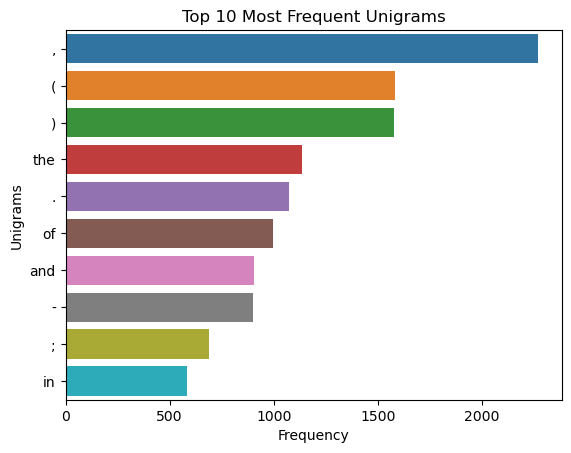

In [16]:
#Bar Chart for Unigrams Frequency
unigram_freq = pd.DataFrame(unigram, columns=['word']).word.value_counts().head(10)
sns.barplot(x=unigram_freq.values, y=unigram_freq.index)
plt.title('Top 10 Most Frequent Unigrams')
plt.xlabel('Frequency')
plt.ylabel('Unigrams')
plt.show()

##  Lowercase the tokens

In [17]:
#lower case the tokens
wf['tokens'] = wf['tokens'].str.lower()
wf.head()

,tokens,pos_tags,ner_tags
0,for,ADP,B-O
1,this,DET,B-O
2,purpose,NOUN,B-O
3,the,DET,B-O
4,gothenburg,PROPN,B-LF


## Frequency of Tokens

In [18]:
from nltk import FreqDist

# Construct a frequency distribution over the lowercased words 
plod_data = FreqDist(w.lower() for w in wf['tokens'])
# Find the top 10 most frequent tokens
print("PLOD_DATA\n", plod_data.most_common(10))

PLOD_DATA
 [(',', 2268), ('(', 1583), (')', 1575), ('the', 1270), ('.', 1073), ('of', 1006), ('and', 903), ('-', 901), (';', 691), ('in', 639)]


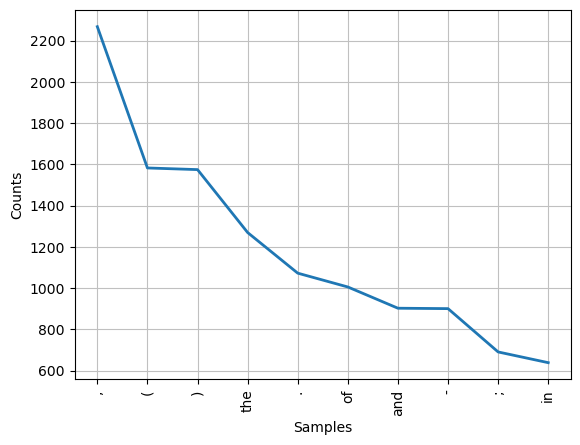

<Axes: xlabel='Samples', ylabel='Counts'>

In [19]:
#plot distribution of most frequent tokens
plod_data.plot(10)

## Normalization

In [20]:
from collections import Counter
import string

# Define a function to normalize tokens
def normalize_tokens(tokens):
    normalized_tokens = []
    for token in tokens.values:
        # Remove punctuation
        token = token.translate(str.maketrans('', '', string.punctuation))
        # Remove extra spaces
        token = token.strip()
        if token:
            normalized_tokens.append(token)
    return normalized_tokens

# Normalize the dataset
normalized_tokens = normalize_tokens(wf['tokens'])

# Count the frequency of each normalized token
plod_data_normalized = Counter(normalized_tokens)

print(plod_data_normalized.most_common(10))

[('the', 1271), ('of', 1006), ('and', 904), ('in', 639), ('to', 476), ('a', 394), ('with', 297), ('for', 235), ('were', 201), ('was', 196)]


In [21]:
import string

def remove_punctuation(text):
    no_punct = [char for char in text if char not in string.punctuation]
    words_wo_punct = ''.join(no_punct)
    return words_wo_punct

wf['tokens'] = wf['tokens'].apply(lambda x: remove_punctuation(x))
wf.head(10)

,tokens,pos_tags,ner_tags
0,for,ADP,B-O
1,this,DET,B-O
2,purpose,NOUN,B-O
3,the,DET,B-O
4,gothenburg,PROPN,B-LF
5,young,PROPN,I-LF
6,persons,PROPN,I-LF
7,empowerment,PROPN,I-LF
8,scale,PROPN,I-LF
9,,PUNCT,B-O


## Stop Words removal 

In [22]:
import nltk
from nltk.corpus import stopwords

# Download NLTK stopwords data
nltk.download('stopwords')

# Get the English stop words list
stop_words = set(stopwords.words('english'))

# Function to remove stop words
def remove_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

# Apply stop word removal to each string in the 'tokens' column
wf['tokens'] = wf['tokens'].apply(remove_stopwords)

# Display the first few rows to verify the changes
wf.head(10)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gopal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,tokens,pos_tags,ner_tags
0,,ADP,B-O
1,,DET,B-O
2,purpose,NOUN,B-O
3,,DET,B-O
4,gothenburg,PROPN,B-LF
5,young,PROPN,I-LF
6,persons,PROPN,I-LF
7,empowerment,PROPN,I-LF
8,scale,PROPN,I-LF
9,,PUNCT,B-O


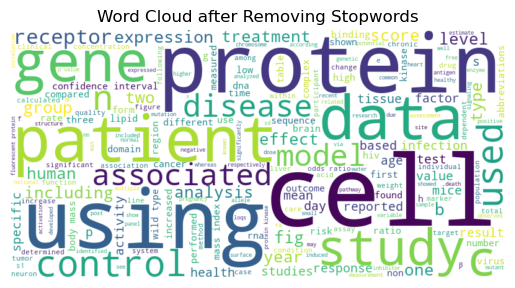

In [23]:
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(' '.join(wf['tokens']))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud after Removing Stopwords')
plt.show()

## Remove Null values and Duplicates

In [24]:
# Remove rows with either NaN values or empty strings in any of the columns
wf = wf.dropna().replace('', np.nan).dropna()

# Reset the index
wf.reset_index(drop=True, inplace=True)

print(wf.head(10))
print('After cleaning the data:',len(wf))

          tokens pos_tags ner_tags
0        purpose     NOUN      B-O
1     gothenburg    PROPN     B-LF
2          young    PROPN     I-LF
3        persons    PROPN     I-LF
4    empowerment    PROPN     I-LF
5          scale    PROPN     I-LF
6          gypes    PROPN     B-AC
7      developed     VERB      B-O
8      following      ADJ      B-O
9  physiological      ADJ      B-O
After cleaning the data: 22057


In [25]:
wf[wf.duplicated(subset=['tokens','pos_tags','ner_tags'])]

,tokens,pos_tags,ner_tags
23,h2o,NOUN,B-O
24,m2,NOUN,B-O
25,s1,NOUN,B-O
28,rate,NOUN,I-LF
31,m2,NOUN,B-O
...,...,...,...
22052,quantitative,ADJ,B-O
22053,pcr,NOUN,B-O
22054,experiments,NOUN,B-O
22055,demonstrated,VERB,B-O


In [26]:
wf.drop_duplicates(subset=['tokens','pos_tags','ner_tags'],inplace=True)
print('After removing duplicates:',len(wf))

After removing duplicates: 10181


## Stemming and Lemmatization

In [27]:
import nltk
from nltk.stem import PorterStemmer, WordNetLemmatizer

# Download NLTK data
nltk.download('wordnet')

# Initialize stemming and lemmatization objects
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

# Function to perform stemming
def stem_text(text):
    stemmed_text = ' '.join([stemmer.stem(word) for word in text.split()])
    return stemmed_text

# Function to perform lemmatization
def lemmatize_text(text):
    lemmatized_text = ' '.join([lemmatizer.lemmatize(word) for word in text.split()])
    return lemmatized_text

#stemming to the tokens column
wf['stemmed_tokens'] = wf['tokens'].apply(stem_text)

#lemmatization to the tokens column
wf['lemmatized_tokens'] = wf['tokens'].apply(lemmatize_text)

wf.head()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\gopal\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,tokens,pos_tags,ner_tags,stemmed_tokens,lemmatized_tokens
0,purpose,NOUN,B-O,purpos,purpose
1,gothenburg,PROPN,B-LF,gothenburg,gothenburg
2,young,PROPN,I-LF,young,young
3,persons,PROPN,I-LF,person,person
4,empowerment,PROPN,I-LF,empower,empowerment


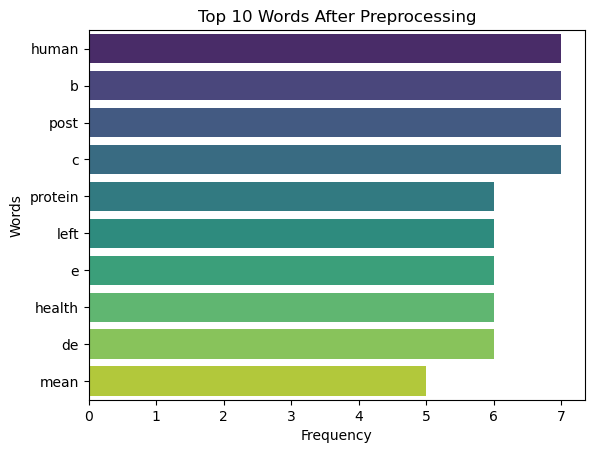

In [28]:
#Bar plot after pre-processing the data
all_words =[word for word in wf['tokens']]
word_freq = pd.Series(all_words).value_counts().head(10)

sns.barplot(x=word_freq.values, y=word_freq.index, palette='viridis')
plt.title('Top 10 Words After Preprocessing')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.show()

## converting the sequences to tokens

In [29]:
#to convert train dataset list of sequences into tokens
words=[word for sentence in df['tokens'] for word in sentence]
pos_tags=[tag for sentence in df['pos_tags'] for tag in sentence]
ner_tags=[tag for sentence in df['ner_tags'] for tag in sentence]

data={'tokens':words,
      'pos_tags':pos_tags,
      'ner_tags':ner_tags}

wf=pd.DataFrame(data)
print(wf.head(5))
print(len(wf))

       tokens pos_tags ner_tags
0         For      ADP      B-O
1        this      DET      B-O
2     purpose     NOUN      B-O
3         the      DET      B-O
4  Gothenburg    PROPN     B-LF
40000


In [30]:
#to convert validation dataset list of sequences into tokens
words=[word for sentence in vf['tokens'] for word in sentence]
pos_tags=[tag for sentence in vf['pos_tags'] for tag in sentence]
ner_tags=[tag for sentence in vf['ner_tags'] for tag in sentence]

data={'tokens':words,
      'pos_tags':pos_tags,
      'ner_tags':ner_tags}

vwf=pd.DataFrame(data)
print(vwf.head(5))
print(len(vwf))

           tokens pos_tags ner_tags
0               =    PUNCT      B-O
1          Manual    PROPN     B-LF
2         Ability    PROPN     I-LF
3  Classification    PROPN     I-LF
4          System    PROPN     I-LF
5000


In [31]:
#to convert test dataset list of sequences into tokens
words=[word for sentence in tef['tokens'] for word in sentence]
pos_tags=[tag for sentence in tef['pos_tags'] for tag in sentence]
ner_tags=[tag for sentence in tef['ner_tags'] for tag in sentence]

data={'tokens':words,
      'pos_tags':pos_tags,
      'ner_tags':ner_tags}

twf=pd.DataFrame(data)
print(twf.head())
print(len(twf))

          tokens pos_tags ner_tags
0  Abbreviations     NOUN      B-O
1              :    PUNCT      B-O
2           GEMS    PROPN     B-AC
3              ,    PUNCT      B-O
4         Global    PROPN     B-LF
5000


In [32]:
#upsampling technique to balance the tags distribution

from imblearn.over_sampling import SMOTE
smote=SMOTE()

# 2.2 Comparing vectorization methods

In [33]:
#Concatenating train,validation and test datasets

train_data = pd.concat([wf, vwf,twf]).reset_index(drop=True) #tokens dataset
train_data_sequences=pd.concat([df,vf,tef]).reset_index(drop=True) #sequences dataset
print(len(train_data))
print(len(train_data_sequences['tokens']))

50000
1351


In [34]:
#encoding sequences dataset ner tags

ner_tags = train_data_sequences['ner_tags']
def encode_tags(tags):
    encoded_tags = []
    for tags in ner_tags:
        for tag in tags:
            encoded_tag = tag_encoder[tag]
            encoded_tags.append(encoded_tag)
    return encoded_tags

tag_encoder = {'B-O': 0, 'B-AC': 1, 'B-LF': 2, 'I-LF': 3}

#Encoding the sequences dataframe
encoded_ner_tags = encode_tags(ner_tags)
print(len(encoded_ner_tags))

50000


In [35]:
#encoding tokens dataset ner tags
ner_tags = train_data['ner_tags']
def encode_tags(tags):
    encoded_tags = []
    for tag in tags:
        encoded_tag = [tag_encoder[tag]]
        encoded_tags.append(encoded_tag)
    return encoded_tags

tag_encoder = {'B-O': 0, 'B-AC': 1, 'B-LF': 2, 'I-LF': 3}
train_data.loc[:,['ner_tags']] = encode_tags(ner_tags)

In [36]:
print(train_data.head())

       tokens pos_tags ner_tags
0         For      ADP        0
1        this      DET        0
2     purpose     NOUN        0
3         the      DET        0
4  Gothenburg    PROPN        2


# 2.2.1 Word2Vec Vectorization

In [37]:
#train the word2vec model with sequences of tokens

from gensim.models.word2vec import Word2Vec

sequences=train_data_sequences['tokens'].tolist()
tokens=train_data['tokens'].tolist()

# Hyperparameters
# vector size defines the size of word vectors
# window size defines context around a word that is considered,
# during training to predict target word 
# min count filter out frequently occured words from training process
# workers is for training parallelization, to speed up training

model_x = Word2Vec(sequences, vector_size=20, window=6, min_count=1, workers=4)

In [38]:
#convert vectors of tokens into list
word_vectors = []
for sentence_tokens in sequences:
    for word in sentence_tokens:
        if word in model_x.wv:
            word_vectors.append(model_x.wv[word])
        else:
            word_vectors.append(np.zeros(20))  #If word not in vocabulary,                                                      use zero vector
print(len(word_vectors))                       #use zero vector

50000


In [39]:
#print the similar words of a given word
model_x.wv.most_similar("Gothenburg")

[('shed', 0.7432326674461365),
 ('commitment', 0.7293590903282166),
 ('Mail', 0.721084713935852),
 ('break', 0.6932496428489685),
 ('WPRE', 0.6858313083648682),
 ('spectrophotometer', 0.6577872037887573),
 ('adiposity', 0.6532239317893982),
 ('pmf', 0.6479343771934509),
 ('deploys', 0.6415600180625916),
 ('counted', 0.6413666009902954)]

In [40]:
#convert the vectors and tags to array for training the data

import numpy as np
X=np.array(word_vectors)
y=np.array(encoded_ner_tags)

In [41]:
#Resampling the data to avoid class-imbalance in dataset
X_smote, y_smote = smote.fit_resample(X,y)

In [42]:
#Divides the data into train and test splits
from sklearn.model_selection import train_test_split

trainX, trainY, testX, testY=train_test_split(X_smote,y_smote,test_size=0.2,random_state=10)

In [43]:
print(trainX.shape)
print(testX.shape)

(132876, 20)
(132876,)


## FFNN Model

In [44]:
from tensorflow.keras import layers, models

# define the FFNN model with input layer, hiddden layers and output layer
model_ffn = models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(20,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(4, activation='softmax')
])
# prints the summary of model
model_ffn.summary()

C:\Users\gopal\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         2,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,156 (51.39 KB)

 Trainable params: 13,156 (51.39 KB)

 Non-trainable params: 0 (0.00 B)

In [45]:
#Compile the model

model_ffn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Fit the data into model for training
history_adam = model_ffn.fit(trainX, testX, epochs=35, batch_size=64,validation_split=0.2)

Epoch 1/35
1661/1661 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.4341 - loss: 1.1818 - val_accuracy: 0.4662 - val_loss: 1.1458
Epoch 2/35
1661/1661 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.4840 - loss: 1.1287 - val_accuracy: 0.5062 - val_loss: 1.0911
Epoch 3/35
1661/1661 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.5321 - loss: 1.0675 - val_accuracy: 0.5487 - val_loss: 1.0424
Epoch 4/35
1661/1661 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.5750 - loss: 1.0042 - val_accuracy: 0.5998 - val_loss: 0.9620
Epoch 5/35
1661/1661 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.6092 - loss: 0.9488 - val_accuracy: 0.6301 - val_loss: 0.9137
Epoch 6/35
1661/1661 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.6325 - loss: 0.9012 - val_accuracy: 0.6388 - val_loss: 0.8847
Epoch 7/35
1661/1661 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.6529 - loss: 0.8626 - val_accuracy: 0.6564 - val_loss: 0.8581
Epoch 8/35
1661/1661 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.6693 - loss: 0.82

In [46]:
from sklearn.metrics import accuracy_score, f1_score, classification_report,confusion_matrix

#predict the labels
y_pred = model_ffn.predict(trainY)
y_pred_labels = np.argmax(y_pred, axis=1)

# calculate the accuracy
accuracy = accuracy_score(testY, y_pred_labels)
#calculate the f1-score
f1 = f1_score(testY, y_pred_labels, average='weighted')

#prints the classification report
report = classification_report(testY, y_pred_labels,target_names=['B-O', 'B-AC', 'B-LF', 'I-LF'])

#confusion matrix of the FFNN model
conf_matrix = confusion_matrix(testY,  y_pred_labels)

print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("\nClassification Report:\n", report)
print("\nConfusion Matrix:\n", conf_matrix)

1039/1039 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step
Accuracy: 0.8001505117399157
F1 Score: 0.7986699753199182

Classification Report:
               precision    recall  f1-score   support

         B-O       0.77      0.68      0.72      8264
        B-AC       0.86      0.93      0.89      8360
        B-LF       0.85      0.84      0.85      8393
        I-LF       0.71      0.75      0.73      8203

    accuracy                           0.80     33220
   macro avg       0.80      0.80      0.80     33220
weighted avg       0.80      0.80      0.80     33220


Confusion Matrix:
 [[5589  676  539 1460]
 [ 238 7768  105  249]
 [ 314  196 7049  834]
 [1112  362  554 6175]]


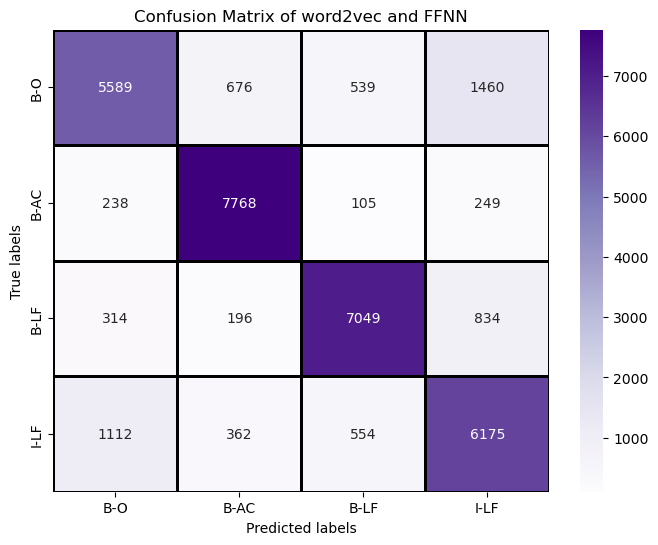

In [47]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Define class labels
class_labels = ['B-O', 'B-AC', 'B-LF', 'I-LF']

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Purples', fmt='g', xticklabels=class_labels, yticklabels=class_labels,
            linewidths=1, linecolor='black')

plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix of word2vec and FFNN')
plt.show()

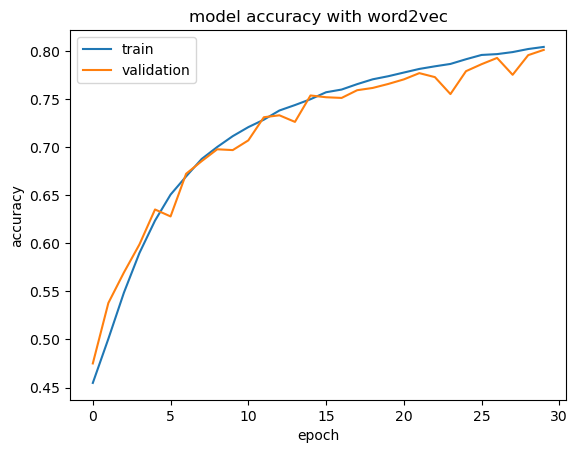

In [190]:
plt.plot(history_adam.history['accuracy'])
plt.plot(history_adam.history['val_accuracy'])
plt.title('model accuracy with word2vec')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# 2.2.2 TF-IDF Vectorization

In [48]:
from sklearn.feature_extraction.text import TfidfVectorizer

# convert the tokens into tf-idf vectors
tokens=train_data['tokens'].tolist()
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(tokens)

In [49]:
print(X.shape)

(50000, 9021)


In [50]:
y=np.array(train_data['ner_tags'].tolist())
print(y.shape)

(50000,)


In [51]:
X2_smote, y2_smote = smote.fit_resample(X,y)

In [52]:
from sklearn.model_selection import train_test_split

trainX2, trainY2, testX2, testY2=train_test_split(X2_smote,y2_smote,test_size=0.2,random_state=10)

In [53]:
print(trainX2.shape)
print(trainY2.shape)
print(testX2.shape)
print(testY2.shape)

(132876, 9021)
(33220, 9021)
(132876,)
(33220,)


In [54]:
from tensorflow.keras import layers, models

#Define the FFNN model for tf-idf vectors
model2_ffn = models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(9021,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(4, activation='softmax')
])
model2_ffn.summary()

C:\Users\gopal\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 128)            │     1,154,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 4)              │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,165,284 (4.45 MB)

 Trainable params: 1,165,284 (4.45 MB)

 Non-trainable params: 0 (0.00 B)

In [55]:
model2_ffn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model2_ffn.fit(trainX2, testX2, epochs=10, batch_size=64)

Epoch 1/10
2077/2077 ━━━━━━━━━━━━━━━━━━━━ 31s 13ms/step - accuracy: 0.6784 - loss: 0.7999
Epoch 2/10
2077/2077 ━━━━━━━━━━━━━━━━━━━━ 28s 13ms/step - accuracy: 0.8397 - loss: 0.4030
Epoch 3/10
2077/2077 ━━━━━━━━━━━━━━━━━━━━ 29s 14ms/step - accuracy: 0.8485 - loss: 0.3761
Epoch 4/10
2077/2077 ━━━━━━━━━━━━━━━━━━━━ 28s 13ms/step - accuracy: 0.8501 - loss: 0.3665
Epoch 5/10
2077/2077 ━━━━━━━━━━━━━━━━━━━━ 28s 13ms/step - accuracy: 0.8532 - loss: 0.3600
Epoch 6/10
2077/2077 ━━━━━━━━━━━━━━━━━━━━ 29s 14ms/step - accuracy: 0.8563 - loss: 0.3527
Epoch 7/10
2077/2077 ━━━━━━━━━━━━━━━━━━━━ 32s 15ms/step - accuracy: 0.8575 - loss: 0.3508
Epoch 8/10
2077/2077 ━━━━━━━━━━━━━━━━━━━━ 30s 14ms/step - accuracy: 0.8574 - loss: 0.3479
Epoch 9/10
2077/2077 ━━━━━━━━━━━━━━━━━━━━ 27s 13ms/step - accuracy: 0.8574 - loss: 0.3467
Epoch 10/10
2077/2077 ━━━━━━━━━━━━━━━━━━━━ 44s 14ms/step - accuracy: 0.8600 - loss: 0.3432


In [70]:
from sklearn.metrics import accuracy_score, f1_score, classification_report

#predictions of tf-idf and FFNN
y_pred = model2_ffn.predict(trainY2)
y_pred_labels = np.argmax(y_pred, axis=1)

accuracy = accuracy_score(testY2, y_pred_labels)
f1 = f1_score(testY2, y_pred_labels, average='weighted')

report = classification_report(testY2, y_pred_labels,target_names=['B-O', 'B-AC', 'B-LF', 'I-LF'])

print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("\nClassification Report:\n", report)

1039/1039 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step
Accuracy: 0.8501505117399157
F1 Score: 0.849423387204656

Classification Report:
               precision    recall  f1-score   support

         B-O       0.75      0.85      0.80      8264
        B-AC       0.97      0.95      0.96      8360
        B-LF       0.87      0.90      0.89      8393
        I-LF       0.82      0.70      0.75      8203

    accuracy                           0.85     33220
   macro avg       0.85      0.85      0.85     33220
weighted avg       0.85      0.85      0.85     33220



Confusion matrix:
 [[5004 1168  766 1326]
 [ 104 7379  638  239]
 [ 373  949 6164  907]
 [1142 1180  981 4900]]


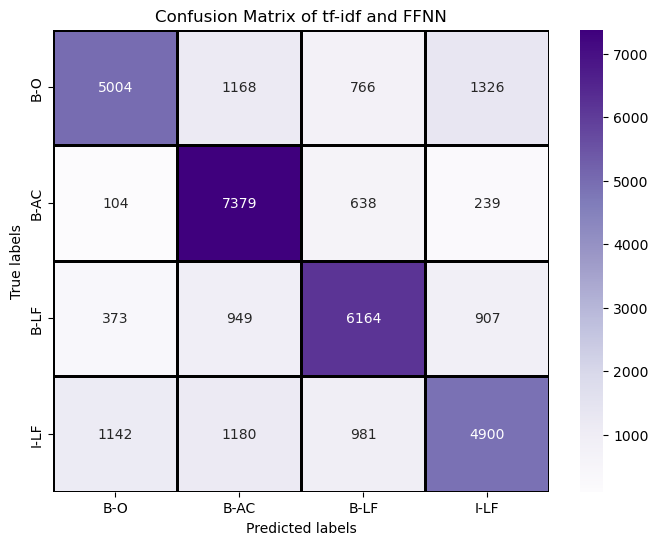

In [134]:
from sklearn.metrics import confusion_matrix
#Generate confusion matrix
conf_matrix = confusion_matrix(testY2, y_pred_labels)
print("Confusion matrix:\n",conf_matrix)

# Define class labels
class_labels = ['B-O', 'B-AC', 'B-LF', 'I-LF']

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Purples', fmt='g', xticklabels=class_labels, yticklabels=class_labels,
            linewidths=1, linecolor='black')

plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix of tf-idf and FFNN')
plt.show()

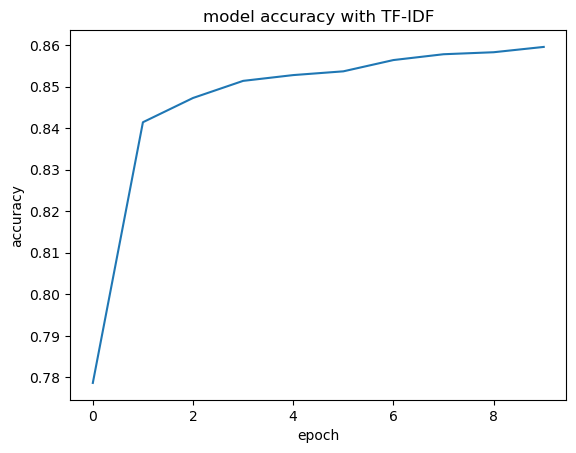

In [48]:
#Accuracy curve
plt.plot(history.history['accuracy'])
plt.title('model accuracy with TF-IDF')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

# 2.2.3 Fast Text Vectorization

In [56]:
from gensim.models import FastText

#train the fast text model with sequences
sequences=train_data_sequences['tokens'].tolist()
#I have choosen these hyper parameters for better training 
model3 = FastText(sequences, vector_size=10, window=5, min_count=1, workers=4)

In [57]:
model3.wv.most_similar("Gothenburg")

[('cis', 0.999987006187439),
 ('assays', 0.9999494552612305),
 ('zucker', 0.9999257326126099),
 ('hyaluronic', 0.9999203681945801),
 ('pre-', 0.999919593334198),
 ('skilled', 0.9999135136604309),
 ('filled', 0.9999127388000488),
 ('Cre', 0.9999057054519653),
 ('secrete', 0.9999050498008728),
 ('diaphanous', 0.9999035596847534)]

In [58]:
#convert the vectors into list
word_vectors3=[]
for sentence_tokens in sequences:
    for word in sentence_tokens:
        if word in model3.wv:
            word_vectors3.append(model3.wv[word])
print(len(word_vectors3))

50000


In [59]:
X3_train=np.array(word_vectors3)
y3_train=np.array(encoded_ner_tags)

In [60]:
X3_smote, y3_smote = smote.fit_resample(X3_train,y3_train)

In [61]:
print(X3_smote.shape)
print(y3_smote.shape)

(166096, 10)
(166096,)


In [62]:
from sklearn.model_selection import train_test_split

trainX3, trainY3, testX3, testY3=train_test_split(X3_smote,y3_smote,test_size=0.2,random_state=10)

In [63]:
from tensorflow.keras import layers, models

#define the FFNN model for Fast Text
model3_ffn = models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(10,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(4, activation='softmax')
])
model3_ffn.summary()

C:\Users\gopal\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 128)            │         1,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 4)              │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,876 (46.39 KB)

 Trainable params: 11,876 (46.39 KB)

 Non-trainable params: 0 (0.00 B)

In [64]:
model3_ffn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model3_ffn.fit(trainX3, testX3, epochs=20, batch_size=64)

Epoch 1/20
2077/2077 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.5660 - loss: 0.9451
Epoch 2/20
2077/2077 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.5929 - loss: 0.9017
Epoch 3/20
2077/2077 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.5955 - loss: 0.8914
Epoch 4/20
2077/2077 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.6081 - loss: 0.8674
Epoch 5/20
2077/2077 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.6257 - loss: 0.8435
Epoch 6/20
2077/2077 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.6315 - loss: 0.8292
Epoch 7/20
2077/2077 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.6360 - loss: 0.8192
Epoch 8/20
2077/2077 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.6371 - loss: 0.8171
Epoch 9/20
2077/2077 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.6417 - loss: 0.8124
Epoch 10/20
2077/2077 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.6424 - loss: 0.8089
Epoch 11/20
2077/2077 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.6450 - loss: 0.8044
Epoch 12/20
2077/2077 ━━━━━━

In [170]:
from sklearn.metrics import accuracy_score, f1_score, classification_report

#predict the labels
y_pred = model3_ffn.predict(trainY3)
y_pred_labels = np.argmax(y_pred, axis=1)

accuracy = accuracy_score(testY3, y_pred_labels)
f1 = f1_score(testY3, y_pred_labels, average='weighted')

report = classification_report(testY3, y_pred_labels,target_names=['B-O', 'B-AC', 'B-LF', 'I-LF'])

print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("\nClassification Report:\n", report)

1039/1039 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step
Accuracy: 0.6589704996989765
F1 Score: 0.6454306750927965

Classification Report:
               precision    recall  f1-score   support

         B-O       0.82      0.49      0.61      8264
        B-AC       0.89      0.93      0.91      8360
        B-LF       0.50      0.87      0.63      8393
        I-LF       0.57      0.34      0.42      8203

    accuracy                           0.66     33220
   macro avg       0.69      0.66      0.64     33220
weighted avg       0.69      0.66      0.65     33220



Confusion matrix:
 [[4034  566 2428 1236]
 [  50 7807  487   16]
 [  90  205 7295  803]
 [ 753  222 4473 2755]]


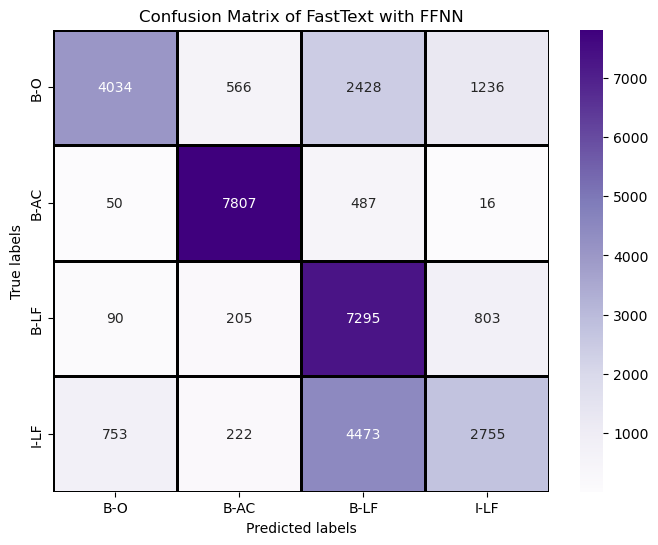

In [171]:
#Generate confusion matrix
conf_matrix = confusion_matrix(testY3, y_pred_labels)
print("Confusion matrix:\n",conf_matrix)

# Define class labels
class_labels = ['B-O', 'B-AC', 'B-LF', 'I-LF']

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Purples', fmt='g', xticklabels=class_labels, yticklabels=class_labels,
            linewidths=1, linecolor='black')

plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix of FastText with FFNN')
plt.show()

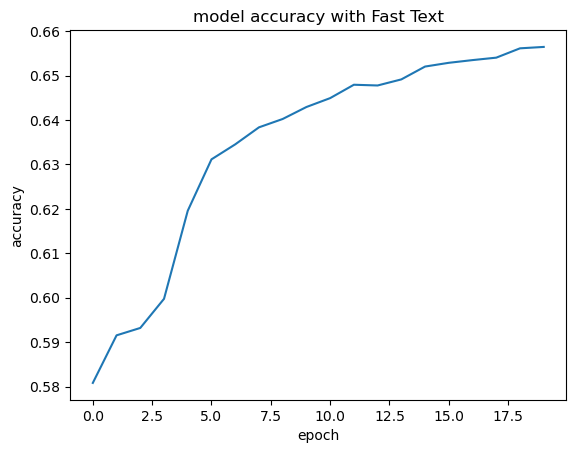

In [83]:
#Accuracy curve
plt.plot(history.history['accuracy'])
plt.title('model accuracy with Fast Text')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

# 2.2.4 Hashing Vectorizer

In [65]:
from sklearn.feature_extraction.text import HashingVectorizer

#vectorize the tokens
tokens=train_data['tokens'].tolist()
vectorizer = HashingVectorizer(n_features=800)
X3 = vectorizer.fit_transform(tokens)
X3.shape

(50000, 800)

In [66]:
y3=np.array(train_data['ner_tags'].tolist())
print(y3.shape)

(50000,)


In [67]:
X4_smote, y4_smote = smote.fit_resample(X3,y3)

In [68]:
from sklearn.model_selection import train_test_split

trainX4, trainY4, testX4, testY4=train_test_split(X4_smote,y4_smote,test_size=0.2,random_state=10)

In [69]:
from tensorflow.keras import layers, models

#define the FFNN model for Hashing Vectorizer
model4_ffn = models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(800,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(4, activation='softmax')
])
model4_ffn.summary()

C:\Users\gopal\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 128)            │       102,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 4)              │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 112,996 (441.39 KB)

 Trainable params: 112,996 (441.39 KB)

 Non-trainable params: 0 (0.00 B)

In [70]:
model4_ffn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model4_ffn.fit(trainX4, testX4, epochs=10, batch_size=64)

Epoch 1/10
2077/2077 ━━━━━━━━━━━━━━━━━━━━ 15s 5ms/step - accuracy: 0.5269 - loss: 1.0928
Epoch 2/10
2077/2077 ━━━━━━━━━━━━━━━━━━━━ 21s 5ms/step - accuracy: 0.6391 - loss: 0.8500
Epoch 3/10
2077/2077 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.6468 - loss: 0.8213
Epoch 4/10
2077/2077 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.6512 - loss: 0.8036
Epoch 5/10
2077/2077 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.6617 - loss: 0.7863
Epoch 6/10
2077/2077 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.6629 - loss: 0.7786
Epoch 7/10
2077/2077 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.6671 - loss: 0.7676
Epoch 8/10
2077/2077 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.6703 - loss: 0.7627
Epoch 9/10
2077/2077 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.6730 - loss: 0.7544
Epoch 10/10
2077/2077 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.6717 - loss: 0.7543


In [90]:
from sklearn.metrics import accuracy_score, f1_score, classification_report

#predictions of hash vectorizer
y_pred = model4_ffn.predict(trainY4)
y_pred_labels = np.argmax(y_pred, axis=1)

accuracy = accuracy_score(testY4, y_pred_labels)
f1 = f1_score(testY4, y_pred_labels, average='weighted')

report = classification_report(testY4, y_pred_labels,target_names=['B-O', 'B-AC', 'B-LF', 'I-LF'])

print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("\nClassification Report:\n", report)

1039/1039 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step
Accuracy: 0.6596026490066225
F1 Score: 0.656775801582304

Classification Report:
               precision    recall  f1-score   support

         B-O       0.65      0.69      0.67      8264
        B-AC       0.70      0.70      0.70      8360
        B-LF       0.67      0.73      0.70      8393
        I-LF       0.62      0.51      0.56      8203

    accuracy                           0.66     33220
   macro avg       0.66      0.66      0.66     33220
weighted avg       0.66      0.66      0.66     33220



Confusion matrix:
 [[5735  901  648  980]
 [ 558 5854 1280  668]
 [ 511  801 6153  928]
 [2038  825 1170 4170]]


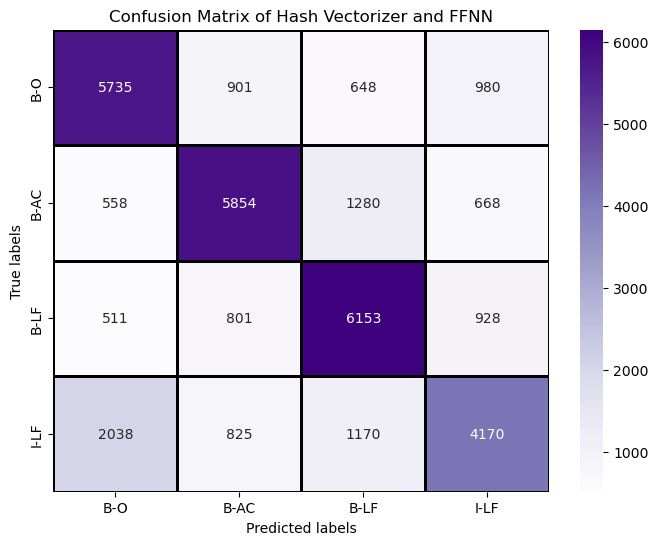

In [91]:
#Generate confusion matrix
conf_matrix = confusion_matrix(testY4, y_pred_labels)
print("Confusion matrix:\n",conf_matrix)

# Define class labels
class_labels = ['B-O', 'B-AC', 'B-LF', 'I-LF']

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Purples', fmt='g', xticklabels=class_labels, yticklabels=class_labels,
            linewidths=1, linecolor='black')

plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix of Hash Vectorizer and FFNN')
plt.show()

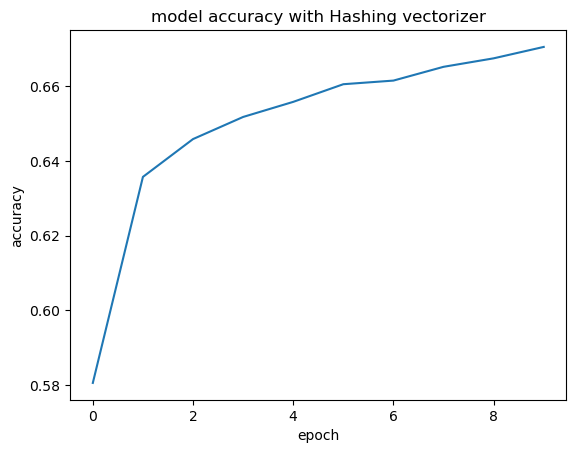

In [92]:
#Accuracy curve
plt.plot(history.history['accuracy'])
plt.title('model accuracy with Hashing vectorizer')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

# 2.3 Comparing algorithms

# word2vec with different Algorithms

In [71]:
from sklearn.model_selection import train_test_split
trainX, trainY, testX, testY=train_test_split(X_smote,y_smote,test_size=0.2,random_state=10)

# 2.3.1 FFNN Algorithm

In [72]:
y_pred = model_ffn.predict(trainY)
y_pred_labels = np.argmax(y_pred, axis=1)

accuracy = accuracy_score(testY, y_pred_labels)
f1 = f1_score(testY, y_pred_labels, average='weighted')

report = classification_report(testY, y_pred_labels,target_names=['B-O', 'B-AC', 'B-LF', 'I-LF'])

conf_matrix = confusion_matrix(testY,  y_pred_labels)

print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("\nClassification Report:\n", report)
print("\nConfusion Matrix:\n", conf_matrix)

1039/1039 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step
Accuracy: 0.8001505117399157
F1 Score: 0.7986699753199182

Classification Report:
               precision    recall  f1-score   support

         B-O       0.77      0.68      0.72      8264
        B-AC       0.86      0.93      0.89      8360
        B-LF       0.85      0.84      0.85      8393
        I-LF       0.71      0.75      0.73      8203

    accuracy                           0.80     33220
   macro avg       0.80      0.80      0.80     33220
weighted avg       0.80      0.80      0.80     33220


Confusion Matrix:
 [[5589  676  539 1460]
 [ 238 7768  105  249]
 [ 314  196 7049  834]
 [1112  362  554 6175]]


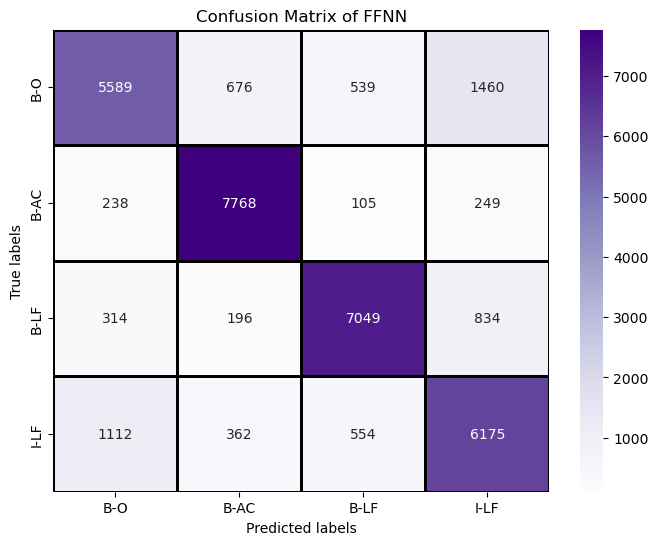

In [73]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Define class labels
class_labels = ['B-O', 'B-AC', 'B-LF', 'I-LF']

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Purples', fmt='g', xticklabels=class_labels, yticklabels=class_labels,
            linewidths=1, linecolor='black')

plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix of FFNN')
plt.show()

# 2.3.2 RandomForest Classifier

In [74]:
from sklearn.model_selection import train_test_split
trainX, trainY, testX, testY=train_test_split(X_smote,y_smote,test_size=0.2,random_state=10)

from sklearn.ensemble import RandomForestClassifier

#Define the Random forest classifier
rclf = RandomForestClassifier(max_depth=40, random_state=0)
rclf.fit(trainX, testX)

RandomForestClassifier(max_depth=40, random_state=0)

In [75]:
y_pred_rfc = rclf.predict(trainY)

accuracy_rfc = accuracy_score(testY, y_pred_rfc)
f1_rfc = f1_score(testY, y_pred_rfc, average='weighted')
report_rfc = classification_report(testY, y_pred_rfc,target_names=['B-O', 'B-AC', 'B-LF', 'I-LF'])
conf_matrix_rfc = confusion_matrix(testY, y_pred_rfc)

print("Accuracy of Random Forest:", accuracy_rfc)
print("F1 Score of Random Forest:", f1_rfc)
print("\nClassification Report of Random Forest:\n", report_rfc)
print("\nConfusion Matrix of Random Forest:\n", conf_matrix_rfc)

Accuracy of Random Forest: 0.8975918121613485
F1 Score of Random Forest: 0.8962015872502926

Classification Report of Random Forest:
               precision    recall  f1-score   support

         B-O       0.87      0.80      0.83      8264
        B-AC       0.91      0.99      0.95      8360
        B-LF       0.93      0.95      0.94      8393
        I-LF       0.87      0.85      0.86      8203

    accuracy                           0.90     33220
   macro avg       0.90      0.90      0.90     33220
weighted avg       0.90      0.90      0.90     33220


Confusion Matrix of Random Forest:
 [[6616  663  250  735]
 [  33 8265   50   12]
 [ 111   27 7975  280]
 [ 869   80  292 6962]]


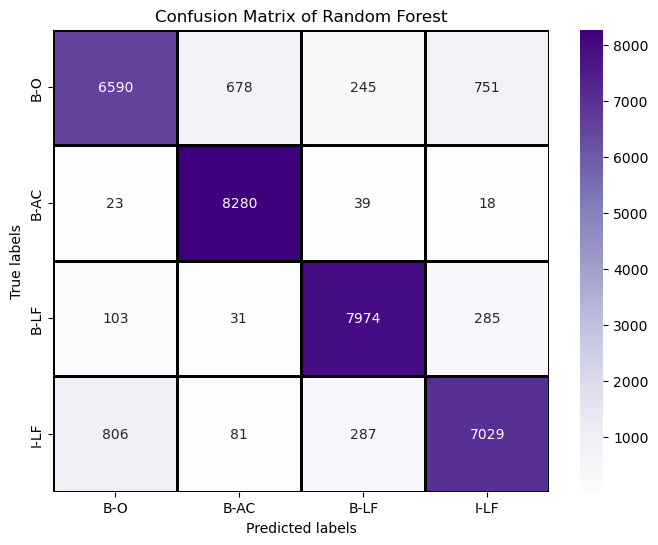

In [125]:
# Define class labels
class_labels = ['B-O', 'B-AC', 'B-LF', 'I-LF']

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rfc, annot=True, cmap='Purples', fmt='g', xticklabels=class_labels, yticklabels=class_labels,
            linewidths=1, linecolor='black')

plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix of Random Forest')
plt.show()

# 2.3.3 Simple RNN

In [76]:
from sklearn.model_selection import train_test_split
trainX, trainY, testX, testY=train_test_split(X_smote,y_smote,test_size=0.2,random_state=10)

from tensorflow.keras import models, layers

#Define the model for simple RNN
model_rnn = models.Sequential([
    layers.SimpleRNN(128, activation='relu', input_shape=(20, 1), return_sequences=False),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(4, activation='softmax')
])

model_rnn.summary()

C:\Users\gopal\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 128)            │        16,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 4)              │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 27,108 (105.89 KB)

 Trainable params: 27,108 (105.89 KB)

 Non-trainable params: 0 (0.00 B)

In [77]:
model_rnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model_rnn.fit(trainX, testX, epochs=20, batch_size=64)

Epoch 1/20
2077/2077 ━━━━━━━━━━━━━━━━━━━━ 31s 13ms/step - accuracy: 0.4352 - loss: 1.1853
Epoch 2/20
2077/2077 ━━━━━━━━━━━━━━━━━━━━ 26s 13ms/step - accuracy: 0.4601 - loss: 1.1541
Epoch 3/20
2077/2077 ━━━━━━━━━━━━━━━━━━━━ 28s 13ms/step - accuracy: 0.4820 - loss: 1.1125
Epoch 4/20
2077/2077 ━━━━━━━━━━━━━━━━━━━━ 27s 13ms/step - accuracy: 0.5243 - loss: 1.0554
Epoch 5/20
2077/2077 ━━━━━━━━━━━━━━━━━━━━ 26s 13ms/step - accuracy: 0.5521 - loss: 1.0165
Epoch 6/20
2077/2077 ━━━━━━━━━━━━━━━━━━━━ 26s 13ms/step - accuracy: 0.5715 - loss: 0.9839
Epoch 7/20
2077/2077 ━━━━━━━━━━━━━━━━━━━━ 26s 12ms/step - accuracy: 0.5864 - loss: 0.9616
Epoch 8/20
2077/2077 ━━━━━━━━━━━━━━━━━━━━ 28s 13ms/step - accuracy: 0.6047 - loss: 0.9330
Epoch 9/20
2077/2077 ━━━━━━━━━━━━━━━━━━━━ 27s 13ms/step - accuracy: 0.6153 - loss: 0.9170
Epoch 10/20
2077/2077 ━━━━━━━━━━━━━━━━━━━━ 39s 12ms/step - accuracy: 0.6280 - loss: 0.8955
Epoch 11/20
2077/2077 ━━━━━━━━━━━━━━━━━━━━ 25s 12ms/step - accuracy: 0.6369 - loss: 0.8846
Epoch 12

In [78]:
y_pred = model_rnn.predict(trainY)
y_pred_labels = np.argmax(y_pred, axis=1)

accuracy = accuracy_score(testY, y_pred_labels)
f1 = f1_score(testY, y_pred_labels, average='weighted')

report = classification_report(testY, y_pred_labels,target_names=['B-O', 'B-AC', 'B-LF', 'I-LF'])

conf_matrix_rnn = confusion_matrix(testY,  y_pred_labels)

print("Accuracy of RNN:", accuracy)
print("F1 Score of RNN:", f1)
print("\nClassification Report of RNN:\n", report)
print("\nConfusion Matrix of RNN:\n", conf_matrix_rnn)

1039/1039 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step
Accuracy of RNN: 0.6745635159542445
F1 Score of RNN: 0.6708911404622973

Classification Report of RNN:
               precision    recall  f1-score   support

         B-O       0.80      0.53      0.64      8264
        B-AC       0.66      0.84      0.74      8360
        B-LF       0.67      0.68      0.68      8393
        I-LF       0.61      0.64      0.63      8203

    accuracy                           0.67     33220
   macro avg       0.69      0.67      0.67     33220
weighted avg       0.69      0.67      0.67     33220


Confusion Matrix of RNN:
 [[4386 1176  784 1918]
 [  75 7060  947  278]
 [ 388 1179 5743 1083]
 [ 645 1256 1082 5220]]


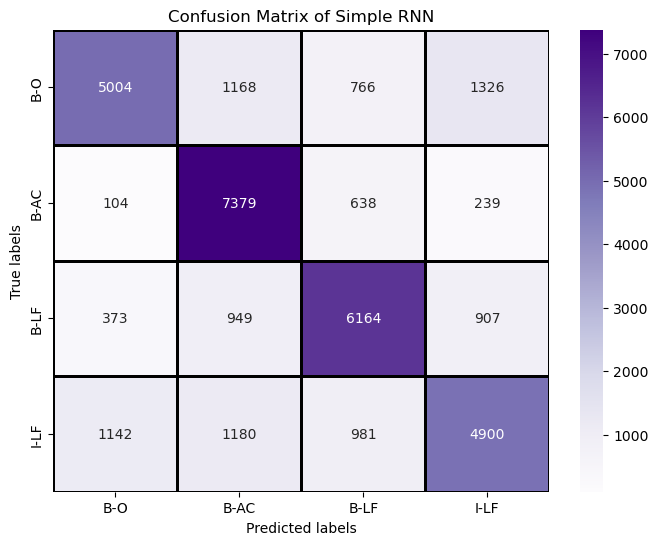

In [130]:
# Define class labels
class_labels = ['B-O', 'B-AC', 'B-LF', 'I-LF']

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rnn, annot=True, cmap='Purples', fmt='g', xticklabels=class_labels, yticklabels=class_labels,
            linewidths=1, linecolor='black')

plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix of Simple RNN')
plt.show()

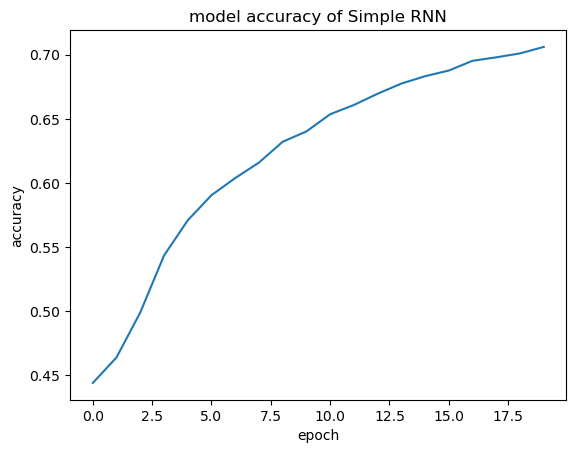

In [131]:
#Accuracy curve
plt.plot(history.history['accuracy'])
plt.title('model accuracy of Simple RNN')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

# 2.4 Changing Loss Functions

In [79]:
from tensorflow.keras import layers, models

model_ffn5 = models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(20,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(4, activation='softmax')
])
model_ffn5.summary()

C:\Users\gopal\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_19 (Dense)                │ (None, 128)            │         2,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 4)              │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,156 (51.39 KB)

 Trainable params: 13,156 (51.39 KB)

 Non-trainable params: 0 (0.00 B)

In [80]:
from sklearn.model_selection import train_test_split
trainX, trainY, testX, testY=train_test_split(X_smote,y_smote,test_size=0.2,random_state=10)

## categorical_crossentropy Loss Function

In [81]:
import tensorflow as tf
testX_one_hot = tf.keras.utils.to_categorical(testX,4)

model_ffn5.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history_cce= model_ffn5.fit(trainX, testX_one_hot, epochs=10, batch_size=64)

Epoch 1/10
2077/2077 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.4396 - loss: 1.1769
Epoch 2/10
2077/2077 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.4901 - loss: 1.1223
Epoch 3/10
2077/2077 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5347 - loss: 1.0628
Epoch 4/10
2077/2077 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5775 - loss: 0.9972
Epoch 5/10
2077/2077 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6136 - loss: 0.9346
Epoch 6/10
2077/2077 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6361 - loss: 0.8898
Epoch 7/10
2077/2077 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6590 - loss: 0.8456
Epoch 8/10
2077/2077 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6779 - loss: 0.8084
Epoch 9/10
2077/2077 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6900 - loss: 0.7851
Epoch 10/10
2077/2077 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.7027 - loss: 0.7520


In [99]:
y_pred = model_ffn5.predict(trainY)
y_pred_labels = np.argmax(y_pred, axis=1)

accuracy = accuracy_score(testY, y_pred_labels)
f1 = f1_score(testY, y_pred_labels, average='weighted')

report = classification_report(testY, y_pred_labels,target_names=['B-O', 'B-AC', 'B-LF', 'I-LF'])

conf_matrix = confusion_matrix(testY,  y_pred_labels)

print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("\nClassification Report:\n", report)
print("\nConfusion Matrix:\n", conf_matrix)

1039/1039 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
Accuracy: 0.724262492474413
F1 Score: 0.7204892476025007

Classification Report:
               precision    recall  f1-score   support

         B-O       0.71      0.65      0.68      8264
        B-AC       0.72      0.93      0.81      8360
        B-LF       0.83      0.70      0.76      8393
        I-LF       0.65      0.62      0.63      8203

    accuracy                           0.72     33220
   macro avg       0.73      0.72      0.72     33220
weighted avg       0.73      0.72      0.72     33220


Confusion Matrix:
 [[5351 1051  509 1353]
 [ 147 7808  134  271]
 [ 514  941 5849 1089]
 [1520 1067  564 5052]]


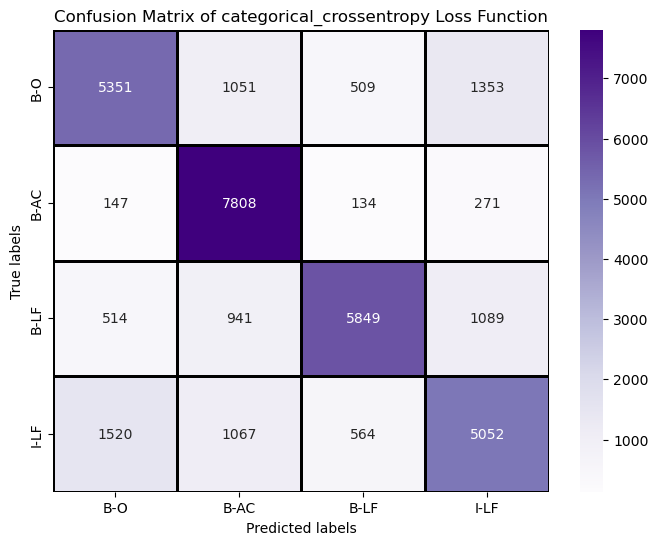

In [100]:
# Define class labels
class_labels = ['B-O', 'B-AC', 'B-LF', 'I-LF']

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Purples', fmt='g', xticklabels=class_labels, yticklabels=class_labels,
            linewidths=1, linecolor='black')

plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix of categorical_crossentropy Loss Function')
plt.show()

## Poisson Loss Function 

In [83]:
from sklearn.model_selection import train_test_split
trainX, trainY, testX, testY=train_test_split(X_smote,y_smote,test_size=0.2,random_state=10)

model_ffn5 = models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(20,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(4, activation='softmax')
])

loss=tf.keras.losses.Poisson(name="poisson")
model_ffn5.compile(optimizer='adam',
              loss=loss,
              metrics=['accuracy'])
history_poisson = model_ffn5.fit(trainX,  testX_one_hot, epochs=10, batch_size=64)

Epoch 1/10
2077/2077 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.4391 - loss: 0.5448
Epoch 2/10
2077/2077 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.5118 - loss: 0.5231
Epoch 3/10
2077/2077 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.5701 - loss: 0.5012
Epoch 4/10
2077/2077 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.6163 - loss: 0.4821
Epoch 5/10
2077/2077 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6503 - loss: 0.4668
Epoch 6/10
2077/2077 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.6714 - loss: 0.4551
Epoch 7/10
2077/2077 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.6885 - loss: 0.4467
Epoch 8/10
2077/2077 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7064 - loss: 0.4376
Epoch 9/10
2077/2077 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7145 - loss: 0.4322
Epoch 10/10
2077/2077 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7297 - loss: 0.4233


In [84]:
y_pred = model_ffn5.predict(trainY)
y_pred_labels = np.argmax(y_pred, axis=1)

accuracy = accuracy_score(testY, y_pred_labels)
f1 = f1_score(testY, y_pred_labels, average='weighted')

report = classification_report(testY, y_pred_labels,target_names=['B-O', 'B-AC', 'B-LF', 'I-LF'])

conf_matrix = confusion_matrix(testY,  y_pred_labels)

print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("\nClassification Report:\n", report)
print("\nConfusion Matrix:\n", conf_matrix)

1039/1039 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
Accuracy: 0.6952739313666466
F1 Score: 0.689379374571491

Classification Report:
               precision    recall  f1-score   support

         B-O       0.67      0.57      0.62      8264
        B-AC       0.74      0.92      0.82      8360
        B-LF       0.78      0.75      0.76      8393
        I-LF       0.57      0.54      0.56      8203

    accuracy                           0.70     33220
   macro avg       0.69      0.69      0.69     33220
weighted avg       0.69      0.70      0.69     33220


Confusion Matrix:
 [[4722 1084  681 1777]
 [  89 7688  295  288]
 [ 336  560 6255 1242]
 [1885 1068  818 4432]]


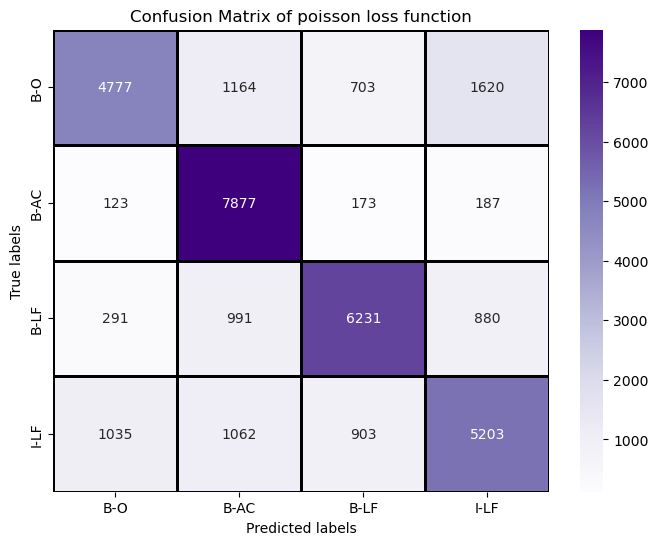

In [264]:
# Define class labels
class_labels = ['B-O', 'B-AC', 'B-LF', 'I-LF']

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Purples', fmt='g', xticklabels=class_labels, yticklabels=class_labels,
            linewidths=1, linecolor='black')

plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix of poisson loss function')
plt.show()

## KL Divergence Loss Function

In [85]:
trainX, trainY, testX, testY=train_test_split(X_smote,y_smote,test_size=0.2,random_state=10)

model_ffn5 = models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(20,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(4, activation='softmax')
])

loss=tf.keras.losses.KLDivergence(name="kl_divergence")
model_ffn5.compile(optimizer='adam',
              loss=loss,
              metrics=['accuracy'])
history_KLD = model_ffn5.fit(trainX,  testX_one_hot, epochs=20, batch_size=64)

Epoch 1/20


C:\Users\gopal\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2077/2077 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.4398 - loss: 1.1783
Epoch 2/20
2077/2077 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.4951 - loss: 1.1133
Epoch 3/20
2077/2077 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.5487 - loss: 1.0405
Epoch 4/20
2077/2077 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.5944 - loss: 0.9675
Epoch 5/20
2077/2077 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.6331 - loss: 0.9009
Epoch 6/20
2077/2077 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6593 - loss: 0.8491
Epoch 7/20
2077/2077 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.6789 - loss: 0.8053
Epoch 8/20
2077/2077 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6970 - loss: 0.7662
Epoch 9/20
2077/2077 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7107 - loss: 0.7347
Epoch 10/20
2077/2077 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7234 - loss: 0.7071
Epoch 11/20
2077/2077 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.7357 - loss: 0.6801
Epoch 12/20
2077/2077 ━━━━━━━━━━━━━━━━━

In [269]:
y_pred = model_ffn5.predict(trainY)
y_pred_labels = np.argmax(y_pred, axis=1)

accuracy = accuracy_score(testY, y_pred_labels)
f1 = f1_score(testY, y_pred_labels, average='weighted')

report = classification_report(testY, y_pred_labels,target_names=['B-O', 'B-AC', 'B-LF', 'I-LF'])

conf_matrix = confusion_matrix(testY,  y_pred_labels)

print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("\nClassification Report:\n", report)
print("\nConfusion Matrix:\n", conf_matrix)

1039/1039 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
Accuracy: 0.7807645996387719
F1 Score: 0.7753408898082219

Classification Report:
               precision    recall  f1-score   support

         B-O       0.81      0.61      0.70      8264
        B-AC       0.83      0.92      0.87      8360
        B-LF       0.75      0.91      0.82      8393
        I-LF       0.74      0.68      0.71      8203

    accuracy                           0.78     33220
   macro avg       0.78      0.78      0.77     33220
weighted avg       0.78      0.78      0.78     33220


Confusion Matrix:
 [[5078  841  878 1467]
 [ 149 7653  446  112]
 [ 147  196 7636  414]
 [ 885  507 1241 5570]]


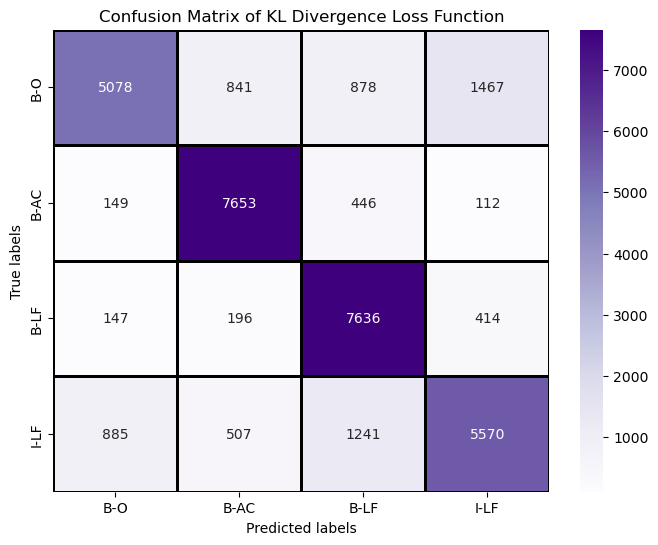

In [270]:
# Define class labels
class_labels = ['B-O', 'B-AC', 'B-LF', 'I-LF']

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Purples', fmt='g', xticklabels=class_labels, yticklabels=class_labels,
            linewidths=1, linecolor='black')

plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix of KL Divergence Loss Function')
plt.show()

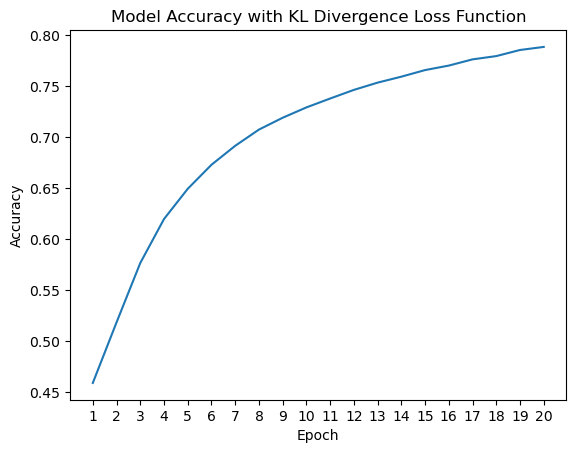

In [271]:
accuracy = history_KLD.history['accuracy']
#accuracy curve
plt.plot(range(1, len(accuracy) + 1), accuracy)
plt.title('Model Accuracy with KL Divergence Loss Function')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.xticks(range(1, len(accuracy) + 1))
plt.show()

## Loss Estimation

In [273]:
cce = tf.keras.losses.CategoricalCrossentropy()
print("CategoricalCrossentropy loss is:",cce(testY, y_pred_labels).numpy())

p = tf.keras.losses.Poisson()
print("\nPoisson loss is:",p(testY, y_pred_labels).numpy())

kl = tf.keras.losses.KLDivergence()
print("\nKLDivergence loss is:",kl(testY, y_pred_labels).numpy())

CategoricalCrossentropy loss is: 523973.88

Poisson loss is: 2.0877752

KLDivergence loss is: 19035.469


## Comparison of Different Loss Functions

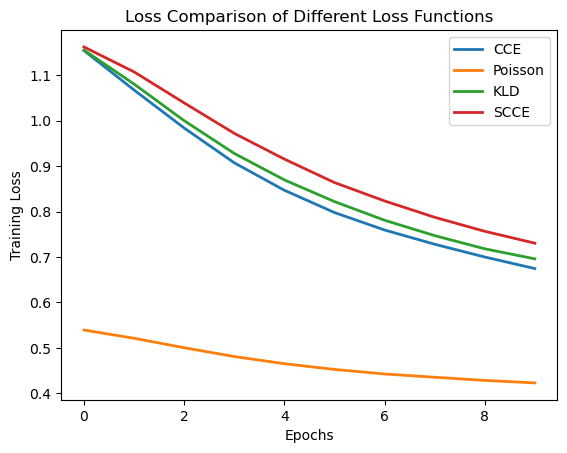

In [277]:
import matplotlib.pyplot as plt

#Plotting the training losses
plt.plot(history_cce.history['loss'], label='CCE',linewidth=2)
plt.plot(history_poisson.history['loss'], label='Poisson',linewidth=2)
plt.plot(history_KLD.history['loss'][:10], label='KLD',linewidth=2)
plt.plot(history_adam.history['loss'][:10], label='SCCE',linewidth=2)

plt.title('Loss Comparison of Different Loss Functions')
plt.xlabel('Epochs')
plt.ylabel('Training Loss')
plt.legend(loc='upper right')
plt.show()

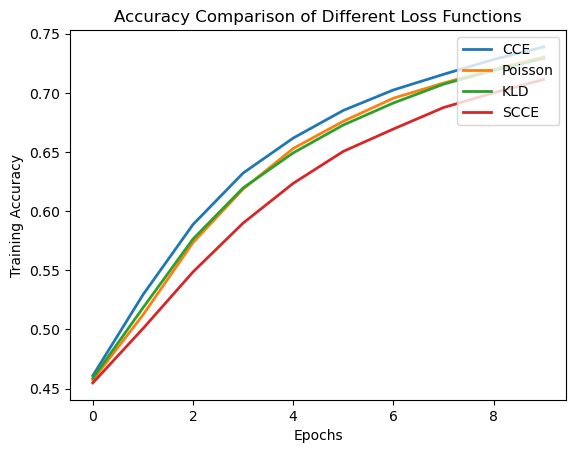

In [281]:
#Plotting the training accuracy
plt.plot(history_cce.history['accuracy'], label='CCE',linewidth=2)
plt.plot(history_poisson.history['accuracy'], label='Poisson',linewidth=2)
plt.plot(history_KLD.history['accuracy'][:10], label='KLD',linewidth=2)
plt.plot(history_adam.history['accuracy'][:10], label='SCCE',linewidth=2)

plt.title('Accuracy Comparison of Different Loss Functions')
plt.xlabel('Epochs')
plt.ylabel('Training Accuracy')
plt.legend(loc='upper right')
plt.show()

# 2.4 Changing Optimizers

## Stochastic Gradient Descent

In [86]:
from tensorflow.keras import layers, models

model_ffn6 = models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(20,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(4, activation='softmax')
])
model_ffn6.summary()
trainX, trainY, testX, testY=train_test_split(X_smote,y_smote,test_size=0.2,random_state=10)

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_31 (Dense)                │ (None, 128)            │         2,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 4)              │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,156 (51.39 KB)

 Trainable params: 13,156 (51.39 KB)

 Non-trainable params: 0 (0.00 B)

In [88]:
from keras.optimizers import SGD

opt = SGD(learning_rate=0.01, momentum=0.9)
model_ffn6.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history_SGD = model_ffn6.fit(trainX, testX, epochs=10, batch_size=64)

Epoch 1/10
2077/2077 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.4975 - loss: 1.0982
Epoch 2/10
2077/2077 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5100 - loss: 1.0849
Epoch 3/10
2077/2077 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.5178 - loss: 1.0709
Epoch 4/10
2077/2077 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.5288 - loss: 1.0577
Epoch 5/10
2077/2077 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.5378 - loss: 1.0465
Epoch 6/10
2077/2077 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.5407 - loss: 1.0399
Epoch 7/10
2077/2077 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.5557 - loss: 1.0229
Epoch 8/10
2077/2077 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5602 - loss: 1.0104
Epoch 9/10
2077/2077 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.5678 - loss: 1.0014
Epoch 10/10
2077/2077 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.5766 - loss: 0.9832


In [117]:
y_pred = model_ffn6.predict(trainY)
y_pred_labels = np.argmax(y_pred, axis=1)

accuracy = accuracy_score(testY, y_pred_labels)
f1 = f1_score(testY, y_pred_labels, average='weighted')

report = classification_report(testY, y_pred_labels,target_names=['B-O', 'B-AC', 'B-LF', 'I-LF'])

conf_matrix = confusion_matrix(testY,  y_pred_labels)

print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("\nClassification Report:\n", report)
print("\nConfusion Matrix:\n", conf_matrix)

1039/1039 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
Accuracy: 0.563064419024684
F1 Score: 0.5590469462860939

Classification Report:
               precision    recall  f1-score   support

         B-O       0.79      0.50      0.61      8264
        B-AC       0.51      0.80      0.63      8360
        B-LF       0.52      0.49      0.50      8393
        I-LF       0.54      0.46      0.49      8203

    accuracy                           0.56     33220
   macro avg       0.59      0.56      0.56     33220
weighted avg       0.59      0.56      0.56     33220


Confusion Matrix:
 [[4144 1575 1063 1482]
 [  68 6728 1318  246]
 [ 139 2643 4098 1513]
 [ 889 2135 1444 3735]]


## Adagrad Optimizer

In [89]:
model_ffn6 = models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(20,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(4, activation='softmax')
])

trainX, trainY, testX, testY=train_test_split(X_smote,y_smote,test_size=0.2,random_state=10)

model_ffn6.compile(optimizer=tf.keras.optimizers.Adagrad(learning_rate=0.5),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history_Adagrad = model_ffn6.fit(trainX, testX, epochs=10, batch_size=64)

Epoch 1/10
2077/2077 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.4367 - loss: 1.6284
Epoch 2/10
2077/2077 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.4633 - loss: 1.1458
Epoch 3/10
2077/2077 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.4812 - loss: 1.1188
Epoch 4/10
2077/2077 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.5012 - loss: 1.0953
Epoch 5/10
2077/2077 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.5137 - loss: 1.0700
Epoch 6/10
2077/2077 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5344 - loss: 1.0447
Epoch 7/10
2077/2077 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.5524 - loss: 1.0196
Epoch 8/10
2077/2077 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.5669 - loss: 1.0025
Epoch 9/10
2077/2077 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.5834 - loss: 0.9751
Epoch 10/10
2077/2077 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.6001 - loss: 0.9544


In [106]:
y_pred = model_ffn6.predict(trainY)
y_pred_labels = np.argmax(y_pred, axis=1)

accuracy = accuracy_score(testY, y_pred_labels)
f1 = f1_score(testY, y_pred_labels, average='weighted')

report = classification_report(testY, y_pred_labels,target_names=['B-O', 'B-AC', 'B-LF', 'I-LF'])

conf_matrix = confusion_matrix(testY,  y_pred_labels)

print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("\nClassification Report:\n", report)
print("\nConfusion Matrix:\n", conf_matrix)

1039/1039 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
Accuracy: 0.5294099939795304
F1 Score: 0.5104308457335798

Classification Report:
               precision    recall  f1-score   support

         B-O       0.68      0.52      0.59      8264
        B-AC       0.51      0.85      0.64      8360
        B-LF       0.50      0.50      0.50      8393
        I-LF       0.43      0.24      0.31      8203

    accuracy                           0.53     33220
   macro avg       0.53      0.53      0.51     33220
weighted avg       0.53      0.53      0.51     33220


Confusion Matrix:
 [[4292 1674 1224 1074]
 [  34 7089  988  249]
 [ 157 2729 4198 1309]
 [1873 2343 1979 2008]]


## Adadelta Optimizer

In [92]:
model_ffn6 = models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(20,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(4, activation='softmax')
])

trainX, trainY, testX, testY=train_test_split(X_smote,y_smote,test_size=0.2,random_state=10)

opt = tf.keras.optimizers.Adadelta(learning_rate=0.1)
model_ffn6.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history_Adadelta = model_ffn6.fit(trainX, testX, epochs=10, batch_size=64)

Epoch 1/10
2077/2077 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.4163 - loss: 1.2142
Epoch 2/10
2077/2077 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4447 - loss: 1.1671
Epoch 3/10
2077/2077 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.4478 - loss: 1.1629
Epoch 4/10
2077/2077 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.4481 - loss: 1.1564
Epoch 5/10
2077/2077 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.4494 - loss: 1.1523
Epoch 6/10
2077/2077 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.4538 - loss: 1.1473
Epoch 7/10
2077/2077 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4630 - loss: 1.1386
Epoch 8/10
2077/2077 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.4743 - loss: 1.1318
Epoch 9/10
2077/2077 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.4783 - loss: 1.1287
Epoch 10/10
2077/2077 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4848 - loss: 1.1213


In [115]:
y_pred = model_ffn6.predict(trainY)
y_pred_labels = np.argmax(y_pred, axis=1)

accuracy = accuracy_score(testY, y_pred_labels)
f1 = f1_score(testY, y_pred_labels, average='weighted')

report = classification_report(testY, y_pred_labels,target_names=['B-O', 'B-AC', 'B-LF', 'I-LF'])

conf_matrix = confusion_matrix(testY,  y_pred_labels)

print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("\nClassification Report:\n", report)
print("\nConfusion Matrix:\n", conf_matrix)

1039/1039 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
Accuracy: 0.5176399759181216
F1 Score: 0.5096511910145479

Classification Report:
               precision    recall  f1-score   support

         B-O       0.85      0.46      0.60      8264
        B-AC       0.46      0.84      0.59      8360
        B-LF       0.45      0.36      0.40      8393
        I-LF       0.51      0.41      0.45      8203

    accuracy                           0.52     33220
   macro avg       0.56      0.52      0.51     33220
weighted avg       0.56      0.52      0.51     33220


Confusion Matrix:
 [[3794 1829 1118 1523]
 [   8 7037  901  414]
 [ 109 3933 3024 1327]
 [ 562 2601 1699 3341]]


## Loss Comparison of Different Optimizers

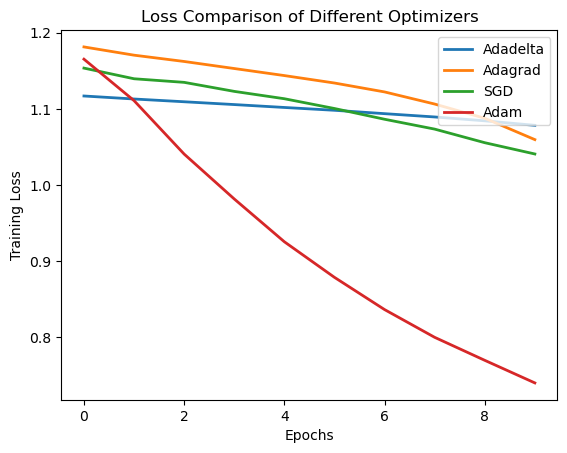

In [118]:
import matplotlib.pyplot as plt

#Plotting the training losses

plt.plot(history_Adadelta.history['loss'], label='Adadelta',linewidth=2)
plt.plot(history_Adagrad.history['loss'], label='Adagrad',linewidth=2)
plt.plot(history_SGD.history['loss'], label='SGD',linewidth=2)
plt.plot(history_adam.history['loss'][:10], label='Adam',linewidth=2)

plt.title('Loss Comparison of Different Optimizers')
plt.xlabel('Epochs')
plt.ylabel('Training Loss')
plt.legend(loc='upper right')
plt.show()

## Accuracy Comparison of Different Optimizers

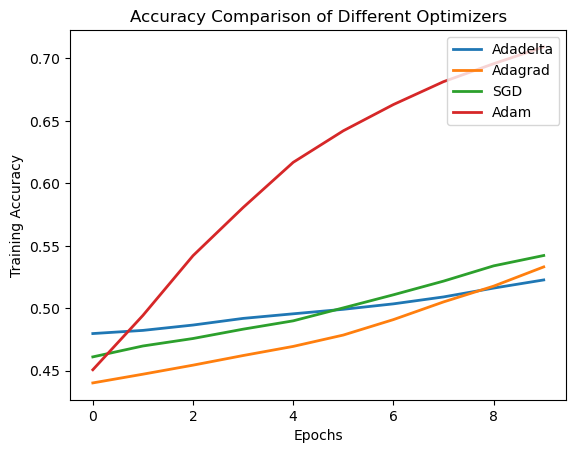

In [119]:
#Plotting the training accuracies

plt.plot(history_Adadelta.history['accuracy'], label='Adadelta',linewidth=2)
plt.plot(history_Adagrad.history['accuracy'], label='Adagrad',linewidth=2)
plt.plot(history_SGD.history['accuracy'], label='SGD',linewidth=2)
plt.plot(history_adam.history['accuracy'][:10], label='Adam',linewidth=2)

plt.title('Accuracy Comparison of Different Optimizers')
plt.xlabel('Epochs')
plt.ylabel('Training Accuracy')
plt.legend(loc='upper right')
plt.show()

# Pipeline to get predictions of given Input

In [93]:
train_data_sequences.loc[3]

tokens           [EPI, =, Echo, planar, imaging, .]
pos_tags    [PROPN, PUNCT, NOUN, NOUN, NOUN, PUNCT]
ner_tags         [B-AC, B-O, B-LF, I-LF, I-LF, B-O]
Name: 3, dtype: object

In [181]:
#Predicting labels for a sentence from the dataset
                        
input_sentence="EPI = Echo planar imaging ."
words=[word for word in input_sentence.split(" ")]

# predictions of word2vec and FFNN
word_vectors=[]
for word in words:
    if word in model_x.wv: 
        word_vectors.append(model_x.wv[word])
    else:
        word_vectors.append(np.zeros(20)) 

X=np.array(word_vectors)
predictions = model_ffn.predict(X)
pred_labels = np.argmax(predictions, axis=1)

# Decoding the predicted labels to original ner tags
tag_decoder = {0: 'B-O', 1:'B-AC', 2:'B-LF', 3:'I-LF'}
output=[]
for tag in pred_labels:
    decoded_tag = tag_decoder[tag]
    output.append(decoded_tag)


# predictions of word2vec and Random Forest
pred_labels_rfc = rclf.predict(X)
output_rfc=[]
for tag in pred_labels_rfc:
    decoded_tag = tag_decoder[tag]
    output_rfc.append(decoded_tag)

    
# predictions of word2vec and Simple RNN
y_pred = model_rnn.predict(X)
pred_labels_rnn = np.argmax(y_pred, axis=1)
output_rnn=[]
for tag in pred_labels_rnn:
    decoded_tag = tag_decoder[tag]
    output_rnn.append(decoded_tag)
    
print("True labels:\n ['B-AC', 'B-O', 'B-LF', 'I-LF', 'I-LF', 'B-O']")
print("\npredictions of word2vec and FFNN:\n",output) 
print("\npredictions of word2vec and Random Forest:\n",output_rfc)
print("\npredictions of word2vec and Simple RNN:\n",output_rnn) 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
True labels:
 ['B-AC', 'B-O', 'B-LF', 'I-LF', 'I-LF', 'B-O']

predictions of word2vec and FFNN:
 ['B-AC', 'B-O', 'B-LF', 'I-LF', 'I-LF', 'B-O']

predictions of word2vec and Random Forest:
 ['B-AC', 'B-O', 'B-LF', 'B-LF', 'B-O', 'B-O']

predictions of word2vec and Simple RNN:
 ['B-AC', 'B-O', 'B-LF', 'I-LF', 'I-LF', 'B-O']


In [94]:
input_sentence="Both Mekk3 cKO and their wild - type"
words=[word for word in input_sentence.split(" ")]

# predictions of word2vec and FFNN
word_vectors=[]
for word in words:
    if word in model_x.wv: 
        word_vectors.append(model_x.wv[word])
    else:
        word_vectors.append(np.zeros(20)) 

X=np.array(word_vectors)
predictions = model_ffn.predict(X)
pred_labels = np.argmax(predictions, axis=1)

tag_decoder = {0: 'B-O', 1:'B-AC', 2:'B-LF', 3:'I-LF'}
output=[]
for tag in pred_labels:
    decoded_tag = tag_decoder[tag]
    output.append(decoded_tag)
print("true predictions:\n ['B-O', 'B-O', 'B-AC', 'B-O', 'B-O', 'B-LF', 'I-LF', 'I-LF']")
print("\npredictions of word2vec and FFNN:\n",output) 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
true predictions:
 ['B-O', 'B-O', 'B-AC', 'B-O', 'B-O', 'B-LF', 'I-LF', 'I-LF']

predictions of word2vec and FFNN:
 ['I-LF', 'B-AC', 'B-AC', 'B-O', 'I-LF', 'B-LF', 'I-LF', 'I-LF']


In [95]:
input_sentence="As shown in Fig 1 , the genetic dista"
words=[word for word in input_sentence.split(" ")]

# predictions of word2vec and FFNN
word_vectors=[]
for word in words:
    if word in model_x.wv: 
        word_vectors.append(model_x.wv[word])
    else:
        word_vectors.append(np.zeros(20)) 

X=np.array(word_vectors)
predictions = model_ffn.predict(X)
pred_labels = np.argmax(predictions, axis=1)

tag_decoder = {0: 'B-O', 1:'B-AC', 2:'B-LF', 3:'I-LF'}
output=[]
for tag in pred_labels:
    decoded_tag = tag_decoder[tag]
    output.append(decoded_tag)
print("true predictions:\n ['B-O', 'B-O', 'B-O', 'B-O', 'B-O', 'B-O', 'B-O', 'B-LF', 'I-LF']")
print("\npredictions of word2vec and FFNN:\n",output) 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
true predictions:
 ['B-O', 'B-O', 'B-O', 'B-O', 'B-O', 'B-O', 'B-O', 'B-LF', 'I-LF']

predictions of word2vec and FFNN:
 ['B-O', 'B-O', 'B-O', 'B-O', 'I-LF', 'B-O', 'B-O', 'B-LF', 'I-LF']


# 4 Dicussion of results
## Re-run the Word2Vec and FFNN model

In [100]:
# here vector dimension is changed to 100
model_x = Word2Vec(sequences, vector_size=100, window=6, min_count=1, workers=4)

In [101]:
#convert vectors of tokens into list
word_vectors = []
for sentence_tokens in sequences:
    for word in sentence_tokens:
        if word in model_x.wv:
            word_vectors.append(model_x.wv[word])
        else:
            word_vectors.append(np.zeros(100))  #If word not in vocabulary,                                                      use zero vector
print(len(word_vectors))                       #use zero vector

50000


In [102]:
#print the similar words of a given word
model_x.wv.most_similar("Gothenburg")

[('IGP', 0.8689970970153809),
 ('FISH', 0.8681311011314392),
 ('metabolites', 0.8649521470069885),
 ('ESC', 0.8646435141563416),
 ('enzyme', 0.8633586168289185),
 ('percentage', 0.863002359867096),
 ('underwent', 0.8626384735107422),
 ('often', 0.8622263073921204),
 ("'", 0.8619606494903564),
 ('product', 0.8617897033691406)]

In [103]:
#convert the vectors and tags to array for training the data

import numpy as np
X=np.array(word_vectors)
y=np.array(encoded_ner_tags)

In [104]:
#Resampling the data to avoid class-imbalance in dataset
X_smote, y_smote = smote.fit_resample(X,y)

In [105]:
#Divides the data into train and test splits
from sklearn.model_selection import train_test_split

trainX, trainY, testX, testY=train_test_split(X_smote,y_smote,test_size=0.2,random_state=10)

In [106]:
print(trainX.shape)
print(testX.shape)

(132876, 100)
(132876,)


In [107]:
from tensorflow.keras import layers, models

# define the FFNN model with input layer, hiddden layers and output layer
model_ffn = models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(100,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(4, activation='softmax')
])
# prints the summary of model
model_ffn.summary()

C:\Users\gopal\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_43 (Dense)                │ (None, 128)            │        12,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_44 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_45 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_46 (Dense)                │ (None, 4)              │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,396 (91.39 KB)

 Trainable params: 23,396 (91.39 KB)

 Non-trainable params: 0 (0.00 B)

In [108]:
#Compile the model

model_ffn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Fit the data into model for training
history_adam = model_ffn.fit(trainX, testX, epochs=70, batch_size=64,validation_split=0.2)

Epoch 1/70
1661/1661 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.4361 - loss: 1.1822 - val_accuracy: 0.4565 - val_loss: 1.1655
Epoch 2/70
1661/1661 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4623 - loss: 1.1534 - val_accuracy: 0.4847 - val_loss: 1.1180
Epoch 3/70
1661/1661 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5026 - loss: 1.1056 - val_accuracy: 0.5328 - val_loss: 1.0661
Epoch 4/70
1661/1661 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5453 - loss: 1.0441 - val_accuracy: 0.5730 - val_loss: 0.9974
Epoch 5/70
1661/1661 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.5906 - loss: 0.9647 - val_accuracy: 0.6168 - val_loss: 0.9181
Epoch 6/70
1661/1661 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6271 - loss: 0.8947 - val_accuracy: 0.6448 - val_loss: 0.8656
Epoch 7/70
1661/1661 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.6520 - loss: 0.8397 - val_accuracy: 0.6495 - val_loss: 0.8505
Epoch 8/70
1661/1661 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6681 - loss: 0.7909 - 

In [109]:
from sklearn.metrics import accuracy_score, f1_score, classification_report,confusion_matrix

#predict the labels
y_pred = model_ffn.predict(trainY)
y_pred_labels = np.argmax(y_pred, axis=1)

# calculate the accuracy
accuracy = accuracy_score(testY, y_pred_labels)
#calculate the f1-score
f1 = f1_score(testY, y_pred_labels, average='weighted')

#prints the classification report
report = classification_report(testY, y_pred_labels,target_names=['B-O', 'B-AC', 'B-LF', 'I-LF'])

#confusion matrix of the FFNN model
conf_matrix = confusion_matrix(testY,  y_pred_labels)

print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("\nClassification Report:\n", report)
print("\nConfusion Matrix:\n", conf_matrix)

1039/1039 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
Accuracy: 0.8498795906080674
F1 Score: 0.848954406560147

Classification Report:
               precision    recall  f1-score   support

         B-O       0.79      0.77      0.78      8264
        B-AC       0.94      0.96      0.95      8360
        B-LF       0.88      0.90      0.89      8393
        I-LF       0.78      0.77      0.77      8203

    accuracy                           0.85     33220
   macro avg       0.85      0.85      0.85     33220
weighted avg       0.85      0.85      0.85     33220


Confusion Matrix:
 [[6362  385  424 1093]
 [ 188 8030   66   76]
 [ 196   71 7562  564]
 [1268   89  567 6279]]


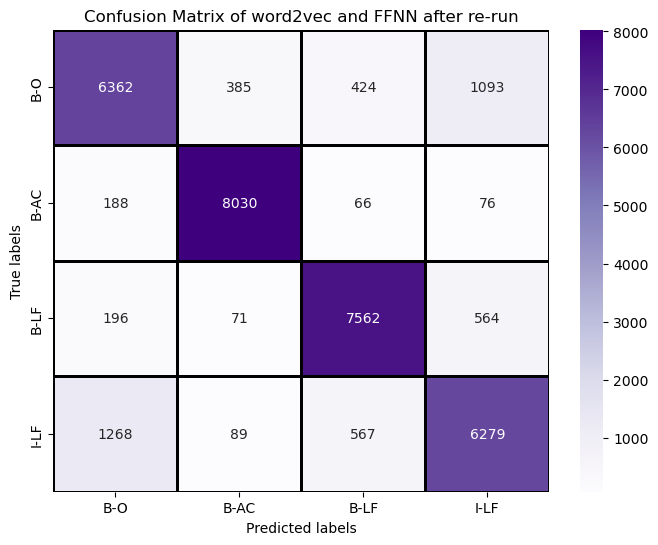

In [110]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Define class labels
class_labels = ['B-O', 'B-AC', 'B-LF', 'I-LF']

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Purples', fmt='g', xticklabels=class_labels, yticklabels=class_labels,
            linewidths=1, linecolor='black')

plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix of word2vec and FFNN after re-run')
plt.show()